### Load Data

In [94]:
import pandas as pd
import os
import numpy as np

In [16]:
all_data = pd.DataFrame()

for files in os.listdir(): 
    file_data = pd.read_csv(files, sep=';')

    # concat all the data
    all_data = pd.concat([all_data, file_data])

## Data Exploration

In [17]:
all_data.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,82.46,7.44,49.68%,92.25%,7.89%,6.32%,1.88
1,Ahri,Mage,MID,God,87.83,-4.51,51.98%,94.27%,12.29%,15.70%,2.47
2,Akali,Assassin,MID,S,63.11,-2.97,48.68%,65.49%,7.29%,16.67%,2.26
3,Akali,Assassin,TOP,A,51.22,-1.29,47.95%,33.57%,3.52%,16.67%,1.96
4,Akshan,Marksman,MID,A,51.13,0.16,50.99%,59.83%,3.16%,10.11%,2.13


In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5544 entries, 0 to 231
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5544 non-null   object 
 1   Class   5540 non-null   object 
 2   Role    5544 non-null   object 
 3   Tier    5544 non-null   object 
 4   Score   5544 non-null   float64
 5   Trend   5544 non-null   float64
 6   Win %   5544 non-null   object 
 7   Role %  5544 non-null   object 
 8   Pick %  5544 non-null   object 
 9   Ban %   5544 non-null   object 
 10  KDA     5544 non-null   float64
dtypes: float64(3), object(8)
memory usage: 519.8+ KB


There's 4 missing `class` values, let's check

In [22]:
all_data[all_data['Class'].isnull()]

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
80,K'Sante,NaN,TOP,God,75.69,-4.57,46.52%,86.15%,9.89%,14.89%,1.91
77,K'Sante,NaN,TOP,God,77.42,1.73,48.94%,90.11%,8.18%,15.65%,2.03
74,K'Sante,NaN,TOP,God,80.26,0.00,45.33%,85.07%,14.48%,16.08%,1.80
93,Lillia,NaN,TOP,D,24.34,-9.25,49.20%,11.49%,0.40%,1.01%,1.96


In [25]:
# Impute K'Sante class with fighter and Lilia with mage
all_data.loc[all_data['Name'] == "K'Sante", 'Class'] = "Fighter"
all_data.loc[all_data['Name'] == "Lilia", 'Class'] = "Mage"

Since there are many different versions in S12 alone, I would group by champions `Name` and get the median value for the variables and do further visualizations 

In [42]:
# Convert the percentage columns to float64
all_data[['Win %', 'Role %', 'Pick %', 'Ban %']] = all_data[['Win %', 'Role %', 'Pick %', 'Ban %']].apply(lambda x: x.str.replace("%", " ")).astype('float64')

# Groupby
df = all_data.groupby('Name').median().reset_index()

from scipy import stats

# get the modes for each champion
df2 = all_data.groupby('Name')['Class', 'Role', 'Tier'].agg(lambda x: stats.mode(x)[0]).reset_index()

# Convert lists to strings and remove brackets
df2['Class'] = df2['Class'].apply(lambda x: ''.join(x))
df2['Role'] = df2['Role'].apply(lambda x: ''.join(x))
df2['Tier'] = df2['Tier'].apply(lambda x: ''.join(x))

# Join two tables 
full_df = pd.merge(df, df2, on="Name")
full_df

,Name,Score,Trend,Win %,Role %,Pick %,Ban %,KDA,Class,Role,Tier
0,Aatrox,78.040,0.310,49.540,92.640,7.610,6.320,1.910,Fighter,TOP,God
1,Ahri,71.470,-1.790,50.380,94.270,8.680,4.830,2.550,Mage,MID,God
2,Akali,60.000,-1.235,48.265,49.890,6.110,16.200,2.190,Assassin,MID,S
3,Akshan,46.480,-0.320,50.940,34.630,2.350,7.170,2.110,Marksman,MID,B
4,Alistar,43.570,0.440,49.170,95.980,3.090,0.660,2.460,Tank,SUPPORT,B
...,...,...,...,...,...,...,...,...,...,...,...
157,Zeri,39.460,-1.305,46.095,88.920,4.830,5.535,2.235,Marksman,ADC,D
158,Ziggs,40.695,-0.335,50.765,39.375,1.085,0.355,2.440,Mage,MID,B
159,Zilean,49.740,0.370,51.540,47.105,1.880,2.165,3.235,Support,MID,A
160,Zoe,47.980,-0.225,48.340,89.645,3.160,1.630,2.465,Mage,MID,A


## Visualization

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Top 10 champions by Score and WR

In [109]:
# Get the top 10 champions by score and WR
top_bottom_10_by_score = pd.concat([full_df.nlargest(10, 'Score'), full_df.nsmallest(10, 'Score').sort_values(by='Score', ascending=False)]).reset_index()
top_bottom_10_by_win = pd.concat([full_df.nlargest(10, 'Win %'), full_df.nsmallest(10, 'Win %').sort_values(by='Win %', ascending=False)]).reset_index()

# Initialize and set colour of dframes
X = np.array(['green', 'red'])
X = np.repeat(X, [10, 10], axis=0)

top_bottom_10_by_score['color'] = X
top_bottom_10_by_win['color'] = X

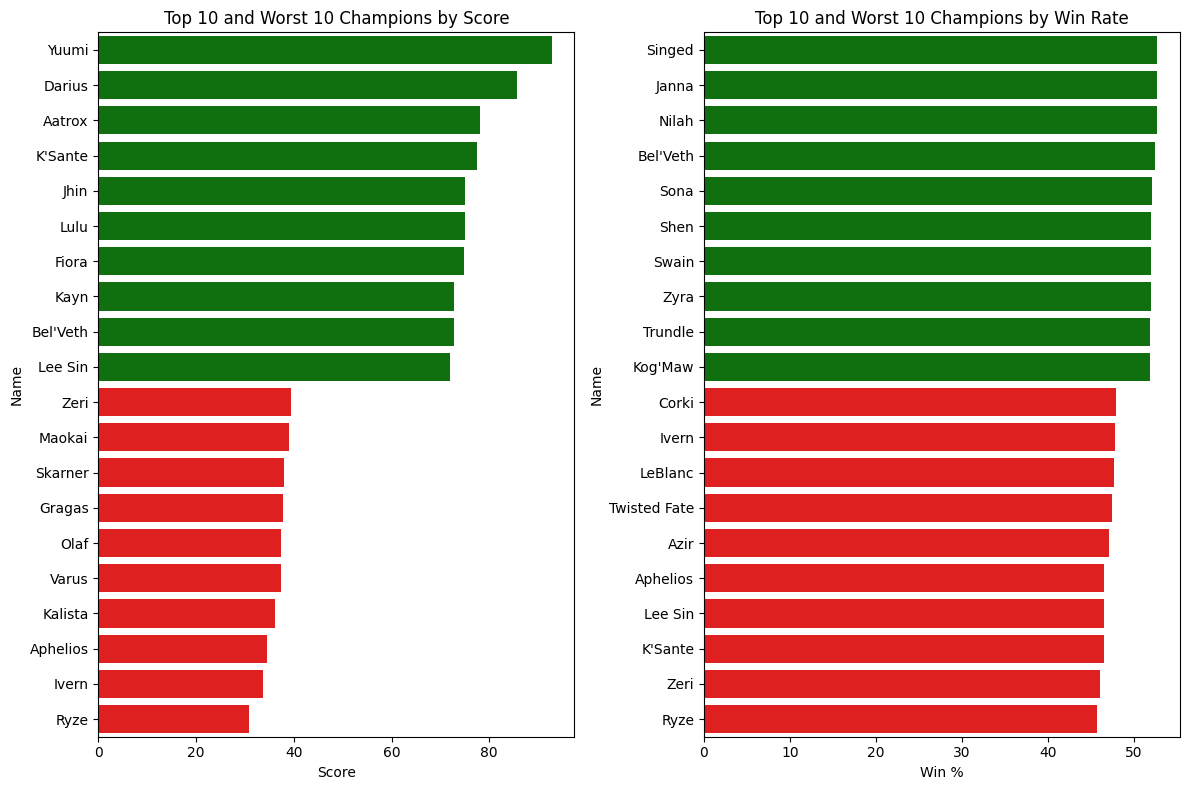

In [110]:
# Create a bar plot
plt.figure(figsize=(12, 8))

# Score
plt.subplot(1, 2, 1)
sns.barplot(x='Score', y='Name', data=top_bottom_10_by_score, orient='h', palette = top_bottom_10_by_score['color'])
plt.title("Top 10 and Worst 10 Champions by Score")

# WR
plt.subplot(1, 2, 2)
sns.barplot(x='Win %', y='Name', data=top_bottom_10_by_win, orient='h', palette = top_bottom_10_by_win['color'])
plt.title("Top 10 and Worst 10 Champions by Win Rate")

plt.tight_layout()
plt.show()

#### Average Score & WR Per Class and Role

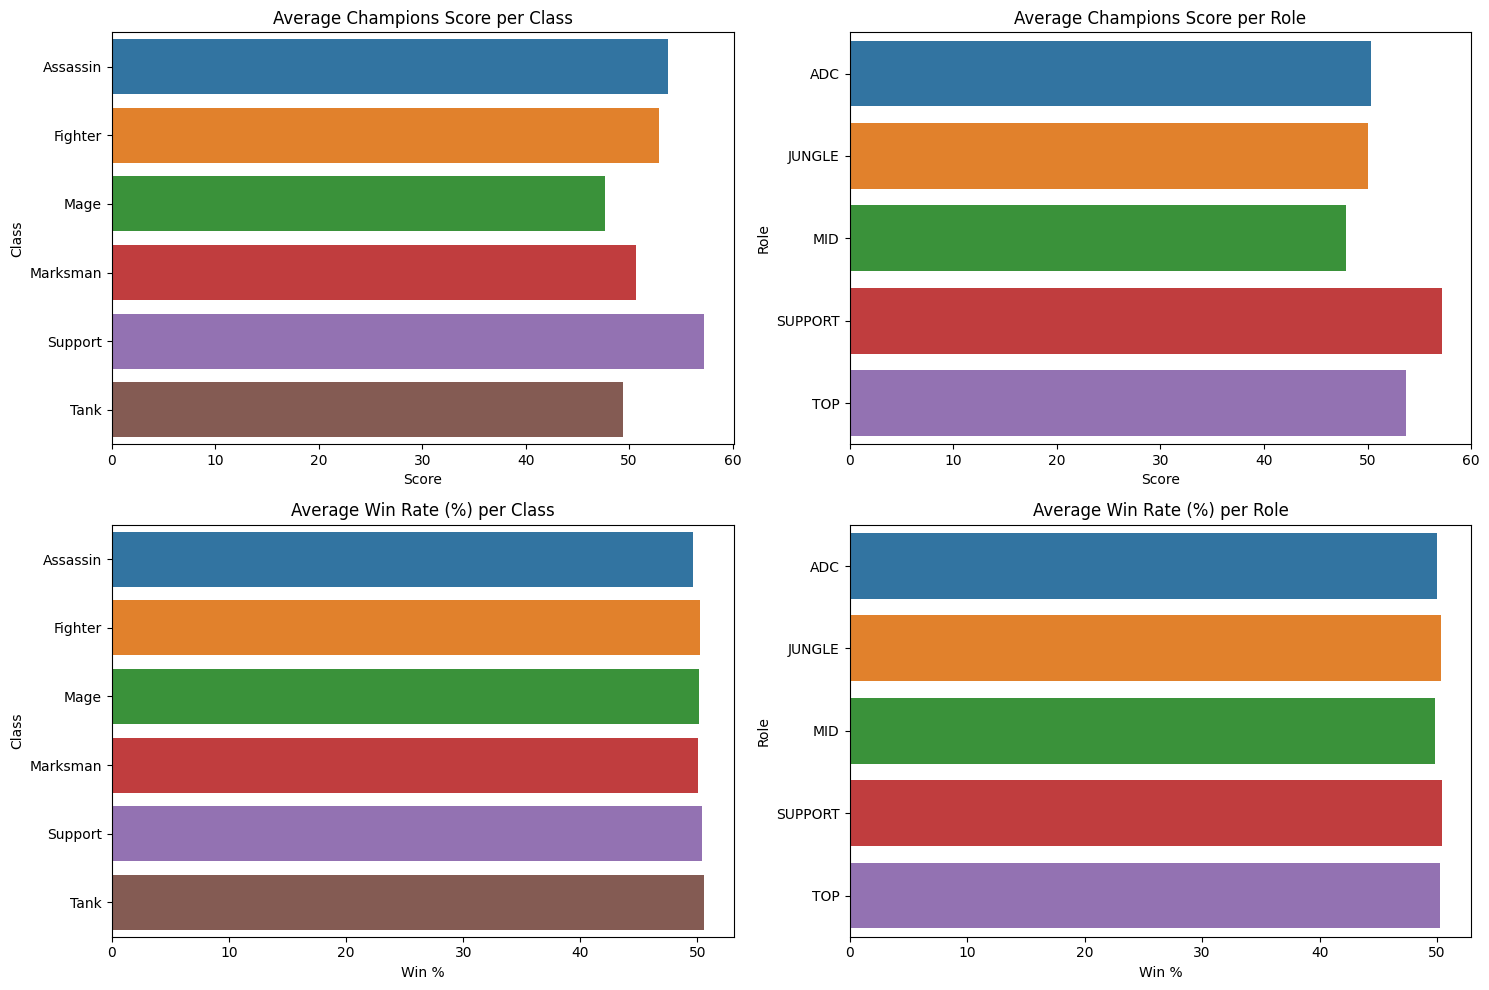

In [73]:
# calculate average score per class and role
average_score_per_class = full_df.groupby('Class')['Score'].mean().reset_index()
average_score_per_role = full_df.groupby('Role')['Score'].mean().reset_index()

# calculate win rate per class and role
average_win_per_class = full_df.groupby('Class')['Win %'].mean().reset_index()
average_win_per_role = full_df.groupby('Role')['Win %'].mean().reset_index()

# Create a bar plot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Average score per class
sns.barplot(y='Class', x='Score', data=average_score_per_class, orient='h', ax=axs[0, 0])
axs[0, 0].set_title('Average Champions Score per Class')

# Average score per Role
sns.barplot(y='Role', x='Score', data=average_score_per_role, orient='h', ax=axs[0, 1])
axs[0, 1].set_title('Average Champions Score per Role')

# Average WR per class
sns.barplot(y='Class', x='Win %', data=average_win_per_class, orient='h', ax=axs[1, 0])
axs[1, 0].set_title('Average Win Rate (%) per Class')

# Average WR per role
sns.barplot(y='Role', x='Win %', data=average_win_per_role, orient='h', ax=axs[1, 1])
axs[1, 1].set_title('Average Win Rate (%) per Role')

plt.tight_layout()
plt.show()